In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [12]:
df = pd.read_csv('epa-sea-level.csv')

In [13]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [14]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [15]:
df.shape

(134, 5)

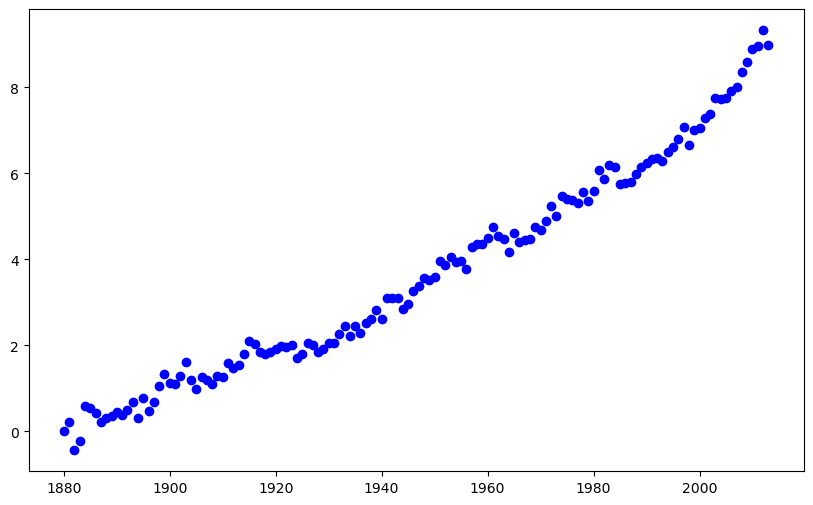

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Original Data')

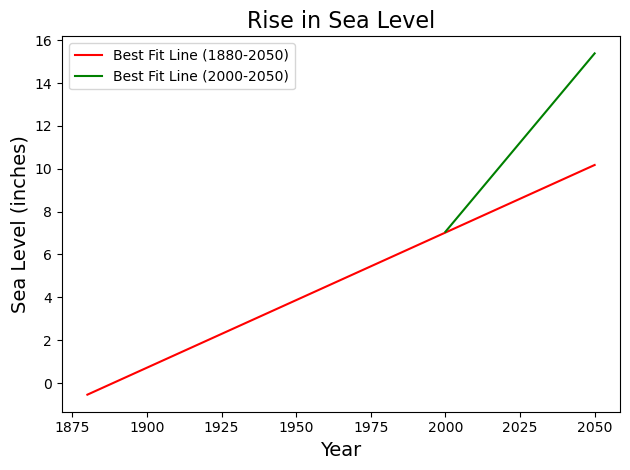

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Original Data')
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
years_extended = pd.Series(range(1880, 2051))
plt.plot(years_extended, intercept + slope * years_extended, 'r', label='Best Fit Line (1880-2050)')
recent_data = df[df['Year'] >= 2000]
slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])
years_recent = pd.Series(range(2000, 2051))
plt.plot(years_recent, intercept_recent + slope_recent * years_recent, 'green', label='Best Fit Line (2000-2050)')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sea Level (inches)', fontsize=14)
plt.title('Rise in Sea Level', fontsize=16)
plt.legend()
# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an image
plt.savefig('sea_level_plot.png')

# Display the plot
plt.show()